# **Inicio**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 01database.csv to 01database (12).csv


In [ ]:
import pandas as pd
df = pd.read_csv('01database.csv', sep=';', decimal=',')
df.head()

,Generacion,Fec.Nac.,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,...,Matematica 7,Tecnologia 7,E Fisica 7,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Nivel 7
0,2017,21-06-2003,5.7,6.2,6.4,6.0,6.0,6.6,6.8,6.4,...,4.5,6.8,6.0,4.3,5.6,6.7,6.1,5.5,97.0,no avanzado
1,2017,02-08-2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,06-08-2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,10-10-2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.3,6.0,6.4,4.7,4.3,6.9,5.9,5.4,90.0,no avanzado
4,2017,18-12-2003,5.0,5.4,5.6,6.0,6.0,5.4,5.9,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Cantidad de columnas
df.shape[1]

86

# **Limpieza del DataSet**

In [ ]:
# Hacer copia de trabajo
df_filtrado = df.copy()

# Calcula el número de valores nulos para cada fila y almacénalo en una nueva columna nulos
df_filtrado['nulos'] = df_filtrado.isnull().sum(axis=1)

#Eliminar estudiantes con mas de 30 columnas nulas
df_filtrado1 = df_filtrado[df_filtrado["nulos"] <= 30].copy()
df_filtrado1.head()

,Generacion,Fec.Nac.,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,...,Tecnologia 7,E Fisica 7,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Nivel 7,nulos
0,2017,21-06-2003,5.7,6.2,6.4,6.0,6.0,6.6,6.8,6.4,...,6.8,6.0,4.3,5.6,6.7,6.1,5.5,97.0,no avanzado,0
5,2017,27-03-2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.7,4.0,4.3,6.3,6.1,5.4,98.0,no avanzado,10
6,2017,01-04-2004,4.0,5.7,5.5,5.2,5.2,6.9,6.9,6.7,...,7.0,6.8,5.3,5.4,6.8,6.9,5.9,98.0,no avanzado,0
7,2017,26-04-2004,6.5,5.9,6.7,6.2,6.2,5.3,6.2,6.8,...,6.9,6.7,4.9,4.4,6.3,5.3,5.6,95.0,no avanzado,0
8,2017,03-05-2004,5.4,6.6,6.5,6.1,6.1,6.0,5.9,6.6,...,6.9,6.9,4.9,5.8,6.9,5.7,6.0,97.0,avanzado,0


In [ ]:
# Columnas de promedios anuales
columnas_promedios = ['Prom 1', 'Prom 2', 'Prom 3', 'Prom 4', 'Prom 5', 'Prom 6']

# Reemplazar ',' por '.' y convertir a float en las columnas de promedio
for col in columnas_promedios:
    if col in df_filtrado1.columns:
        # Verificar tipo de dato antes de aplicar .str
        if df_filtrado1[col].dtype == 'object':
            df_filtrado1[col] = df_filtrado1[col].str.replace(',', '.', regex=False).astype(float)
        else:
            try:
                df_filtrado1[col] = df_filtrado1[col].astype(float)
            except ValueError:
                print(f"Warning: No se pudo convertir la columna '{col}' a float.")

# Calcular el promedio general del estudiante a partir de Prom 1 a Prom 6
df_filtrado1['Promedio_general_estudiante'] = df_filtrado1[columnas_promedios].mean(axis=1).round(1)

# Paso adicional: intentar convertir columnas tipo texto a float si es posible
for col in df_filtrado1.columns:
    if df_filtrado1[col].dtype == object:
        df_filtrado1[col] = df_filtrado1[col].str.replace(',', '.', regex=False)
        try:
            df_filtrado1[col] = df_filtrado1[col].astype(float)
        except ValueError:
            continue  # Si no se puede convertir, se ignora

# Imputar valores faltantes con el promedio general del estudiante
for col in df_filtrado1.columns:
    if col != 'Nivel 7':  # No modificar la variable categórica objetivo
        if df_filtrado1[col].dtype in ['float64', 'int64']:
            df_filtrado1[col] = df_filtrado1[col].fillna(df_filtrado1['Promedio_general_estudiante'])

# Mostrar primeras filas del dataset procesado
df_filtrado1.head()


,Generacion,Fec.Nac.,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,...,E Fisica 7,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Nivel 7,nulos,Promedio_general_estudiante
0,2017,21-06-2003,5.7,6.2,6.4,6.0,6.0,6.6,6.8,6.4,...,6.0,4.3,5.6,6.7,6.1,5.5,97.0,no avanzado,0,5.6
5,2017,27-03-2004,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,...,6.7,4.0,4.3,6.3,6.1,5.4,98.0,no avanzado,10,5.7
6,2017,01-04-2004,4.0,5.7,5.5,5.2,5.2,6.9,6.9,6.7,...,6.8,5.3,5.4,6.8,6.9,5.9,98.0,no avanzado,0,5.5
7,2017,26-04-2004,6.5,5.9,6.7,6.2,6.2,5.3,6.2,6.8,...,6.7,4.9,4.4,6.3,5.3,5.6,95.0,no avanzado,0,5.7
8,2017,03-05-2004,5.4,6.6,6.5,6.1,6.1,6.0,5.9,6.6,...,6.9,4.9,5.8,6.9,5.7,6.0,97.0,avanzado,0,6.1


In [ ]:
# Mostrar en cuantas filas Nivel 7 es nulo
df_filtrado1["Nivel 7"].isnull().sum()

np.int64(13)

In [ ]:
#eliminar filas donde esté nivel 7 sea nulo
df_filtrado2 = df_filtrado1[df_filtrado1["Nivel 7"].notnull()]
df_filtrado2.head()

,Generacion,Fec.Nac.,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,...,E Fisica 7,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Nivel 7,nulos,Promedio_general_estudiante
0,2017,21-06-2003,5.7,6.2,6.4,6.0,6.0,6.6,6.8,6.4,...,6.0,4.3,5.6,6.7,6.1,5.5,97.0,no avanzado,0,5.6
5,2017,27-03-2004,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,...,6.7,4.0,4.3,6.3,6.1,5.4,98.0,no avanzado,10,5.7
6,2017,01-04-2004,4.0,5.7,5.5,5.2,5.2,6.9,6.9,6.7,...,6.8,5.3,5.4,6.8,6.9,5.9,98.0,no avanzado,0,5.5
7,2017,26-04-2004,6.5,5.9,6.7,6.2,6.2,5.3,6.2,6.8,...,6.7,4.9,4.4,6.3,5.3,5.6,95.0,no avanzado,0,5.7
8,2017,03-05-2004,5.4,6.6,6.5,6.1,6.1,6.0,5.9,6.6,...,6.9,4.9,5.8,6.9,5.7,6.0,97.0,avanzado,0,6.1


In [ ]:
# Verificacion de que se eliminaron los nulos de nivel 7
df_filtrado2["Nivel 7"].isnull().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame de trabajo
df_filtrado3 = df_filtrado2.copy()

# Crear el codificador
le = LabelEncoder()

# Codificar la variable 'Nivel 7' como numérica: avanzado 1, no avanzado 0
df_filtrado3["Nivel 7 codificado"] = 1 - le.fit_transform(df_filtrado3["Nivel 7"])
df_filtrado3.head()

,Generacion,Fec.Nac.,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,...,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Nivel 7,nulos,Promedio_general_estudiante,Nivel 7 codificado
0,2017,21-06-2003,5.7,6.2,6.4,6.0,6.0,6.6,6.8,6.4,...,4.3,5.6,6.7,6.1,5.5,97.0,no avanzado,0,5.6,0
5,2017,27-03-2004,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,...,4.0,4.3,6.3,6.1,5.4,98.0,no avanzado,10,5.7,0
6,2017,01-04-2004,4.0,5.7,5.5,5.2,5.2,6.9,6.9,6.7,...,5.3,5.4,6.8,6.9,5.9,98.0,no avanzado,0,5.5,0
7,2017,26-04-2004,6.5,5.9,6.7,6.2,6.2,5.3,6.2,6.8,...,4.9,4.4,6.3,5.3,5.6,95.0,no avanzado,0,5.7,0
8,2017,03-05-2004,5.4,6.6,6.5,6.1,6.1,6.0,5.9,6.6,...,4.9,5.8,6.9,5.7,6.0,97.0,avanzado,0,6.1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear lista de columnas a normalizar (solo numéricas útiles, excluyendo las no predictoras)
columnas_a_excluir = ["Generacion", "Fec.Nac.", "Nivel 7", "Nivel 7 codificado", "nulos"]
features = [col for col in df_filtrado3.columns if col not in columnas_a_excluir and df_filtrado3[col].dtype in [float, int]]

# Inicializar el normalizador
scaler = StandardScaler()

# Aplicar normalización
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtrado3[features]), columns=features).round(3)

# Agregar la variable objetivo codificada
df_scaled["Nivel 7 codificado"] = df_filtrado3["Nivel 7 codificado"].values

# Mostrar primeras filas del DataFrame escalado
df_scaled.head()


,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,Prom 1,% 1,...,Tecnologia 7,E Fisica 7,C Naturales 7,Historia 7,A Visuales 7,A Musicales 7,Prom 7,% 7,Promedio_general_estudiante,Nivel 7 codificado
0,-0.638,-0.240,0.556,-0.541,-0.438,0.062,0.732,-0.882,-0.164,0.424,...,0.900,-1.491,-1.678,0.013,0.245,-0.310,-0.914,0.469,-1.258,0
1,-0.638,-1.185,-0.714,-1.211,-1.071,-2.139,-2.227,-2.941,-1.778,-3.579,...,-0.318,0.210,-2.080,-1.737,-0.416,-0.310,-1.119,0.677,-1.008,0
2,-3.312,-1.185,-1.077,-2.328,-2.126,0.796,1.001,-0.000,-1.509,0.295,...,1.204,0.453,-0.339,-0.256,0.410,1.164,-0.092,0.677,-1.508,0
3,0.620,-0.807,1.101,-0.094,-0.016,-3.117,-0.882,0.294,-0.433,0.381,...,1.052,0.210,-0.875,-1.602,-0.416,-1.784,-0.708,0.051,-1.008,0
4,-1.110,0.517,0.738,-0.318,-0.227,-1.405,-1.689,-0.294,-0.433,0.467,...,1.052,0.696,-0.875,0.282,0.575,-1.047,0.113,0.469,-0.007,1


In [ ]:
df_final = df_scaled.copy()

# Identificar columnas que hacen referencia a 7° básico (excepto "Nivel 7")
columnas_7basico = [col for col in df_final.columns if " 7" in col and "Nivel" not in col]

# Eliminar esas columnas
df_final = df_final.drop(columns=columnas_7basico)
df_final.head(28)

,Lenguaje 1,Ingles 1,Matematica 1,C Naturales 1,Historia 1,Tecnologia 1,E Artistica 1,E Fisica 1,Prom 1,% 1,...,C Naturales 6,Historia 6,Exp Oral y Escrita 6,Razonamiento Mat 6,A Visuales 6,A Musicales 6,Prom 6,% 6,Promedio_general_estudiante,Nivel 7 codificado
0,-0.638,-0.240,0.556,-0.541,-0.438,0.062,0.732,-0.882,-0.164,0.424,...,-1.265,0.357,-0.509,-0.970,-0.530,-0.199,-1.053,0.401,-1.258,0
1,-0.638,-1.185,-0.714,-1.211,-1.071,-2.139,-2.227,-2.941,-1.778,-3.579,...,-1.522,-1.139,-0.834,-1.200,-2.716,-0.541,-1.417,0.150,-1.008,0
2,-3.312,-1.185,-1.077,-2.328,-2.126,0.796,1.001,-0.000,-1.509,0.295,...,-1.779,-0.867,-0.509,-1.429,0.344,0.485,-0.870,0.401,-1.508,0
3,0.620,-0.807,1.101,-0.094,-0.016,-3.117,-0.882,0.294,-0.433,0.381,...,-0.752,-0.595,-0.509,-0.054,-1.404,-1.225,-0.688,0.025,-1.008,0
4,-1.110,0.517,0.738,-0.318,-0.227,-1.405,-1.689,-0.294,-0.433,0.467,...,-1.008,0.357,-0.184,0.176,0.927,-0.712,-0.323,0.025,-0.007,1
5,0.148,0.328,0.556,-0.318,-0.227,0.551,1.001,0.588,0.374,0.038,...,-0.495,-0.459,-0.346,-0.283,0.199,-0.370,-0.506,0.401,-0.257,0
6,0.620,0.517,0.919,-0.541,-0.438,0.551,1.001,-0.000,0.643,0.338,...,0.917,0.901,0.629,1.322,0.636,0.143,0.953,0.526,0.744,1
7,0.934,-0.240,1.646,0.576,0.617,0.796,0.732,-0.000,0.912,0.209,...,-1.265,-1.275,-0.834,-0.627,-0.238,-0.883,-0.870,-1.354,-0.257,0
8,-4.098,-1.374,-1.440,-1.211,-1.071,-0.672,-1.151,-0.588,-2.047,0.209,...,0.275,0.357,-0.184,-0.512,0.927,-0.199,0.041,0.401,-1.258,0
9,0.934,1.085,0.738,0.799,0.828,0.551,1.270,0.882,1.181,0.381,...,1.045,1.581,1.117,0.978,0.927,0.656,1.318,0.526,1.495,1


#**Entrenamiento del modelo**

## ***1. Random Forest Classifier***




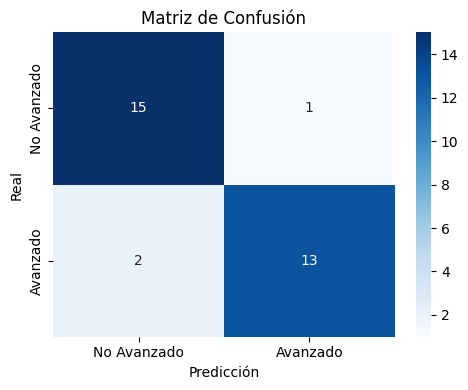

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.88,0.94,0.91,16.0
1,0.93,0.87,0.90,15.0
accuracy,0.90,0.90,0.90,0.9
macro avg,0.91,0.90,0.90,31.0
weighted avg,0.90,0.90,0.90,31.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar X características e y etiqueta
X = df_final.drop('Nivel 7 codificado', axis=1)
y = df_final['Nivel 7 codificado']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Entrenar modelo
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# Predicciones
y_pred1 = model1.predict(X_test)

# Métricas
accuracy1 = accuracy_score(y_test, y_pred1)

# 7. Matriz de confusión como imagen
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Avanzado', 'Avanzado'],
            yticklabels=['No Avanzado', 'Avanzado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# 8. Reporte de clasificación como DataFrame
report = classification_report(y_test, y_pred1, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Reporte de Clasificación:")
display(df_report.round(2))

##  ***2. Gradient Boosting***

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:14:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


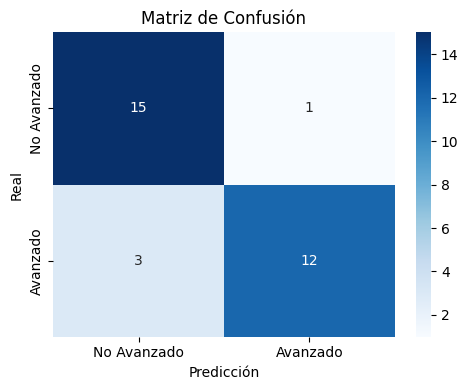

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.83,0.94,0.88,16.00
1,0.92,0.80,0.86,15.00
accuracy,0.87,0.87,0.87,0.87
macro avg,0.88,0.87,0.87,31.00
weighted avg,0.88,0.87,0.87,31.00


In [ ]:
from xgboost import XGBClassifier

model2 = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model2.fit(X_train, y_train)

# Predicciones
y_pred2 = model2.predict(X_test)

# Métricas
accuracy2 = accuracy_score(y_test, y_pred2)

# 7. Matriz de confusión como imagen
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Avanzado', 'Avanzado'],
            yticklabels=['No Avanzado', 'Avanzado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# 8. Reporte de clasificación como DataFrame
report = classification_report(y_test, y_pred2, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Reporte de Clasificación:")
display(df_report.round(2))


## ***3. Regresión Logística***

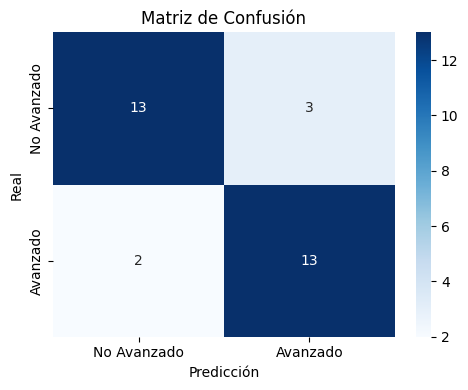

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.87,0.81,0.84,16.00
1,0.81,0.87,0.84,15.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.84,0.84,0.84,31.00
weighted avg,0.84,0.84,0.84,31.00


In [ ]:
from sklearn.linear_model import LogisticRegression

model3 =  LogisticRegression(max_iter=1000)
model3.fit(X_train, y_train)

# Predicciones
y_pred3 = model3.predict(X_test)

# Métricas
accuracy3 = accuracy_score(y_test, y_pred3)

# 7. Matriz de confusión como imagen
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Avanzado', 'Avanzado'],
            yticklabels=['No Avanzado', 'Avanzado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# 8. Reporte de clasificación como DataFrame
report = classification_report(y_test, y_pred3, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Reporte de Clasificación:")
display(df_report.round(2))

## ***4. K-Nearest Neighbors***

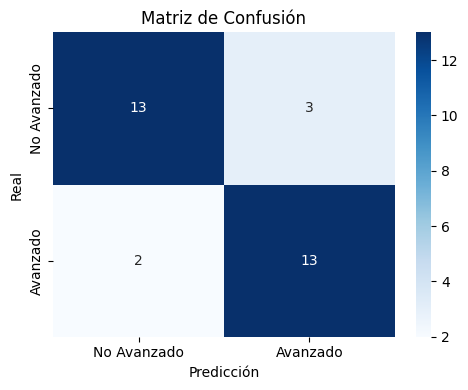

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.87,0.81,0.84,16.00
1,0.81,0.87,0.84,15.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.84,0.84,0.84,31.00
weighted avg,0.84,0.84,0.84,31.00


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Modelo
model4 = KNeighborsClassifier(n_neighbors=5)
model4.fit(X_train, y_train)

# Predicciones
y_pred4 = model4.predict(X_test)

# Métricas
accuracy4 = accuracy_score(y_test, y_pred4)

# 7. Matriz de confusión como imagen
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Avanzado', 'Avanzado'],
            yticklabels=['No Avanzado', 'Avanzado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# 8. Reporte de clasificación como DataFrame
report = classification_report(y_test, y_pred4, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Reporte de Clasificación:")
display(df_report.round(2))

## ***5. MLPClassifier***

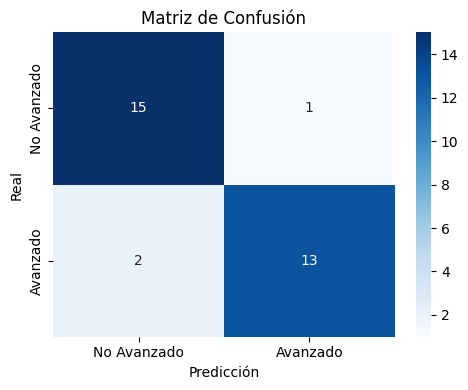

Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.88,0.94,0.91,16.0
1,0.93,0.87,0.90,15.0
accuracy,0.90,0.90,0.90,0.9
macro avg,0.91,0.90,0.90,31.0
weighted avg,0.90,0.90,0.90,31.0


In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier

# Modelo
model5 =  MLPClassifier(hidden_layer_sizes=(100,),
                    max_iter=500,
                    activation='relu',
                    solver='adam',
                    random_state=42)
model5.fit(X_train, y_train)

# Predicciones
y_pred5 = model5.predict(X_test)

# Métricas
accuracy5 = accuracy_score(y_test, y_pred5)

# 7. Matriz de confusión como imagen
cm = confusion_matrix(y_test, y_pred5)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Avanzado', 'Avanzado'],
            yticklabels=['No Avanzado', 'Avanzado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# 8. Reporte de clasificación como DataFrame
report = classification_report(y_test, y_pred5, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Reporte de Clasificación:")
display(df_report.round(2))

# ***Codigo de entrenamiento depurado y eleccion del modelo***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Alineacion de indices
df_final.index = df_filtrado3.index
# Separar características (X) y variable objetivo (y)
X = df_final.drop('Nivel 7 codificado', axis=1)
y = df_final['Nivel 7 codificado']

# División entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


def entrenar_y_evaluar(modelo, nombre_modelo):
    # Entrenamiento
    modelo.fit(X_train, y_train)

    # Predicción
    y_pred = modelo.predict(X_test)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{nombre_modelo} - Accuracy: {accuracy:.2f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Avanzado', 'Avanzado'],
                yticklabels=['No Avanzado', 'Avanzado'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.tight_layout()
    plt.show()

    # Reporte
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print(f"Reporte de Clasificación - {nombre_modelo}:")
    display(df_report.round(2))

    return accuracy, df_report

Random Forest - Accuracy: 0.90


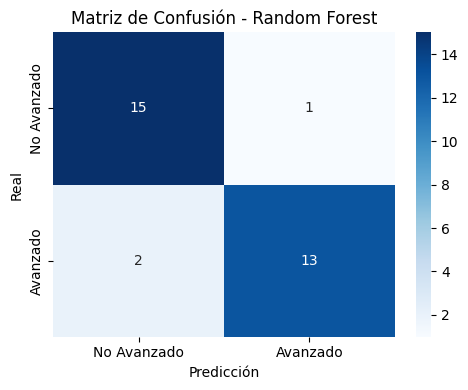

Reporte de Clasificación - Random Forest:


,precision,recall,f1-score,support
0,0.88,0.94,0.91,16.0
1,0.93,0.87,0.90,15.0
accuracy,0.90,0.90,0.90,0.9
macro avg,0.91,0.90,0.90,31.0
weighted avg,0.90,0.90,0.90,31.0


XGBoost - Accuracy: 0.87


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:14:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


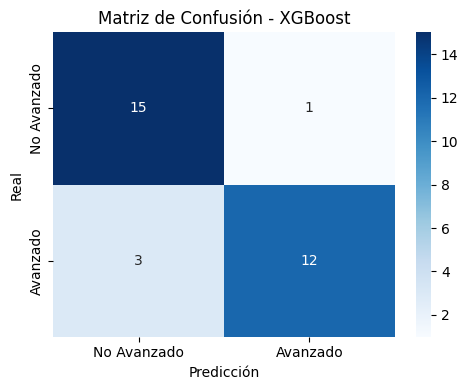

Reporte de Clasificación - XGBoost:


,precision,recall,f1-score,support
0,0.83,0.94,0.88,16.00
1,0.92,0.80,0.86,15.00
accuracy,0.87,0.87,0.87,0.87
macro avg,0.88,0.87,0.87,31.00
weighted avg,0.88,0.87,0.87,31.00


Logistic Regression - Accuracy: 0.84


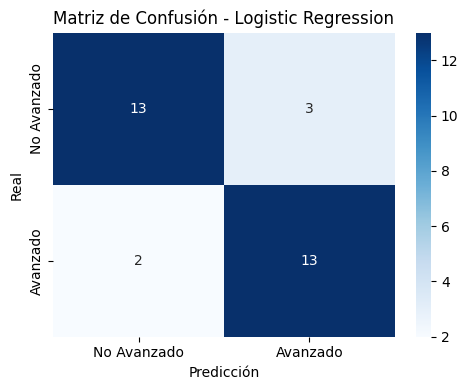

Reporte de Clasificación - Logistic Regression:


,precision,recall,f1-score,support
0,0.87,0.81,0.84,16.00
1,0.81,0.87,0.84,15.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.84,0.84,0.84,31.00
weighted avg,0.84,0.84,0.84,31.00


KNN - Accuracy: 0.84


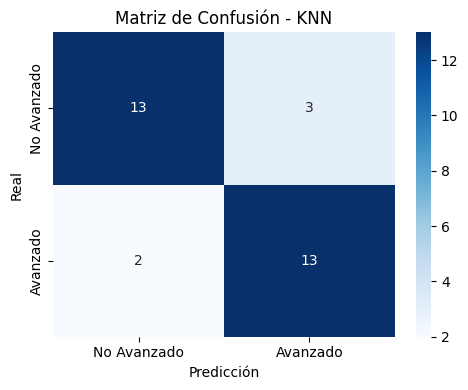

Reporte de Clasificación - KNN:


,precision,recall,f1-score,support
0,0.87,0.81,0.84,16.00
1,0.81,0.87,0.84,15.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.84,0.84,0.84,31.00
weighted avg,0.84,0.84,0.84,31.00


MLP - Accuracy: 0.90


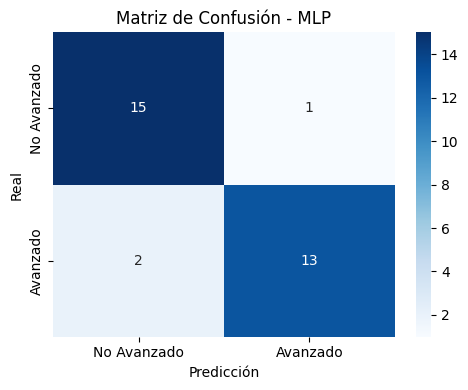

Reporte de Clasificación - MLP:


,precision,recall,f1-score,support
0,0.88,0.94,0.91,16.0
1,0.93,0.87,0.90,15.0
accuracy,0.90,0.90,0.90,0.9
macro avg,0.91,0.90,0.90,31.0
weighted avg,0.90,0.90,0.90,31.0


In [ ]:
# Inicialización de modelos
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Guardar métricas
resultados_accuracy = {}
reportes = {}

for nombre, modelo in modelos.items():
    print("="*60)
    acc, reporte = entrenar_y_evaluar(modelo, nombre)
    resultados_accuracy[nombre] = acc
    reportes[nombre] = reporte


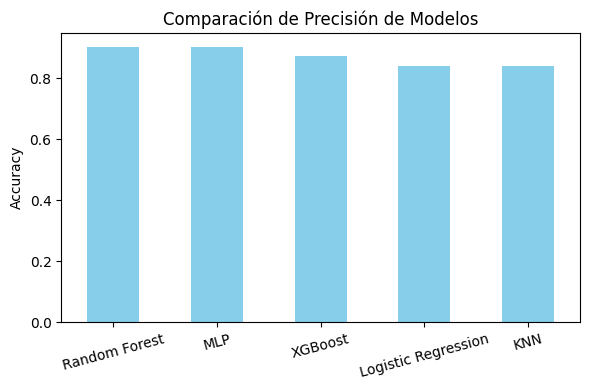

In [ ]:
# Gráfico de comparación de exactitud
plt.figure(figsize=(6,4))
pd.Series(resultados_accuracy).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Comparación de Precisión de Modelos')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [ ]:
# Comparar métricas por modelo (weighted avg)
metricas = ['precision', 'recall', 'f1-score']
tabla_comparativa = pd.DataFrame(columns=metricas)

for nombre, reporte in reportes.items():
    if 'weighted avg' in reporte.index:
        fila = reporte.loc['weighted avg', metricas]
        tabla_comparativa.loc[nombre] = fila

# Agregar Accuracy (CV y Test)
tabla_comparativa['Accuracy Test'] = pd.Series(resultados_accuracy)

# Mostrar tabla comparativa
print("Tabla comparativa final de modelos:")
display(tabla_comparativa.round(2))


Tabla comparativa final de modelos:


,precision,recall,f1-score,Accuracy Test
Random Forest,0.90,0.90,0.90,0.90
XGBoost,0.88,0.87,0.87,0.87
Logistic Regression,0.84,0.84,0.84,0.84
KNN,0.84,0.84,0.84,0.84
MLP,0.90,0.90,0.90,0.90


 Luego de evaluar los cinco modelos de clasificación para predecir el nivel académico de los estudiantes al ingresar a 7° básico, considerando las metricas **precisión**, **recall**, **f1-score** y **exactitud**, podemos evidenciar que **Random Forest** y **MLPClassifier** alcanzaron el mejor desempeño entregando resultados iguales. Sin embargo, hemos decidido optar por **Random Forest** como modelo óptimo debido a las siguientes razones:

- **Interpretabilidad**: permite analizar la importancia de cada variable predictora.
- **Facilidad de ajuste**: requiere menos configuración y es más estable que redes neuronales.
- **Eficiencia computacional**: más rápido de entrenar que el MLP y menos sensible a la escala de datos.
- **Robustez**: maneja mejor los datos ruidosos y la varianza entre generaciones de estudiantes.